# Project: Marketing Campaigns

**Problem Scenario:**
Marketing mix is a popular concept used in implementing marketing strategies. It includes multiple areas of focus as part of a comprehensive marketing plan, which revolves around the four Ps of marketing: product, price, place, and promotion.

**Problem Objective:**
Gain a better understanding of the various factors that contribute to customer acquisition by performing exploratory data analysis and hypothesis testing.

**Data Description:**
The tabular data provided to the user includes variables related to the four Ps of marketing:

* **People:** birth-year, education, income, etc.
* **Product:** amount spent on wine, fruits, gold, etc.
* **Place:** sales channels, like websites, stores, etc.
* **Promotion:** promotions and results of different campaigns.

| Variable | Description |
|---|---|
| ID | Customer's unique identifier |
| Year of birth | Customer's year of birth |
| Education | Customer's highest level of education |
| Marital Status | Customer's marital status |
| Income | Customer's annual income |
| Kidhome | Number of children at home |
| Teenhome | Number of teenagers at home |
| Dt_Customer | Date the customer became a customer |
| Recency | Number of days since the customer's last purchase |
| MntWines | Amount spent on wine in the past year |
| MntFruits | Amount spent on fruits in the past year |
| MntMeatProducts | Amount spent on meat products in the last 2 years |
| MntFishProducts | Amount spent on fish products in the last 2 years |
| MntSweetProducts | Amount spent on sweet products in the last 2 years |
| MntGoldProds | Amount spent on gold products in the last 2 years |
| NumDealsPurchases | Number of purchases made through deals in the last 2 years |
| NumWebPurchases | Number of purchases made through the web in the last 2 years |
| NumCatalog Purchases | Number of purchases made through the catalog in the last 2 years |
| NumStorePurchases | Number of purchases made in stores in the last 2 years |
| NumWebVisitsMonth | Number of visits to the website in the past month |
| AcceptedCmp3 | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4 | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5 | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise |
| AcceptedCmp1 | 1 if the customer accepted the offer in the first campaign, 0 otherwise |
| AcceptedCmp2 | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise |
| Response | 1 if the customer accepted the offer in the last campaign, 0 otherwise |
| Complain | 1 if customer complained in the last 2 years |
| Country | Customer's country of residence |

## Tasks

### Stage 1: Data Preparation

* Import the data and investigate variables to check if they are imported correctly.
* Perform missing value imputation for income values.
* Clean the data, if necessary.
* Create variables to populate the total number of children, age, and total spending.

### Stage 2: Data Exploration

* Create box plots and histograms to understand the distributions and outliers.
* Perform outlier treatment.
* ~~Use ordinal encoding and one hot encoding according to different types of categorical variables.~~
* Create a heatmap to showcase the correlation between different pairs of variables.

### Stage 3: Hypothesis Testing

Test the following hypotheses:

* Older people are not as tech-savvy and probably prefer shopping in-store.
* Customers with kids probably have less time to visit a store and would prefer to shop online.
* Other distribution channels may cannibalize sales at the store.
* Does the US fare significantly better than the rest of the world in terms of total purchases?

### Stage 4: Data Visualization

Use appropriate visualization to help analyze the following:

* Which products are performing the best, and which are performing the least in terms of revenue?
* Is there any pattern between the age of customers and the last campaign acceptance rate?
* Which Country has the greatest number of customers who accepted the last campaign?
* Do you see any pattern in the no. of children at home and total spend?
* Education background of the customers who complained in the last 2 years.


### Stage 1: Data Preparation

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime 

#### Import the data and investigate variables to check if they are imported correctly.

In [2]:
#Reads the given file 
df = pd.read_csv('marketing_data.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


#### Perform missing value imputation for income values.

In [3]:
#Counts the number of null/missing values
print(df.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


#### Clean the data, if necessary.

In [4]:
#checks if we have duplicated rows 
df.duplicated().sum()

0

In [5]:
#checks if we have any null or missing values return true 
df.isnull().values.any()
#True >> we do have missing values
#False >> we do not have missing values 

True

In [6]:
#checks if we have invalid enteries
invalid_values = [np.nan, None,'']
print(df.isin(invalid_values).sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [7]:
#checks and investigate abnormalities in the dataFrame
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [8]:
#Removes the extra whitespaces before or after the column name
df.columns = df.columns.str.replace(' ', '') 

# print file after removing special character 
#print("\n\n", df) 

In [9]:
#Removes the dollar sign from the string income and then convert it to float type
df['Income'] = df['Income'].str.replace('[\$,]', '', regex=True).astype(float)

In [10]:
#Get the mean of the income so we can fill the missing data later
mean = df['Income'].mean()
print("The mean of income: " , mean) 

The mean of income:  52247.25135379061


In [11]:
#Filling the missing cells in income column using the mean of income
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [12]:
#Making sure that we filled the null values in income column
print(df.isna().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64


In [13]:
# Convert the str to lower cases to be consistant 
columns_to_lower = ['Education', 'Marital_Status']
df[columns_to_lower] = df[columns_to_lower].applymap(lambda x: x.lower())

#### Create variables to populate the total number of children, age, and total spending.

In [14]:
#Find the age for each customer
this_year = datetime.now().year

#calculates the age of customers
df['Age'] = this_year - df['Year_Birth']

In [15]:
#Sums the kids and teens number for each customer to total number of children 
df['Total_Children'] = df.loc[:,['Kidhome','Teenhome']].sum(axis=1)

In [16]:
#Sums the total number of spending/purchases for each customer
df['Total_Spending'] = df.loc[:,['MntWines','MntFruits', 'MntMeatProducts', 
                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [ ]:
#Check if the columns were added correctly
df

### Stage 2: Data Exploration

#### Create box plots and histograms to understand the distributions and outliers.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

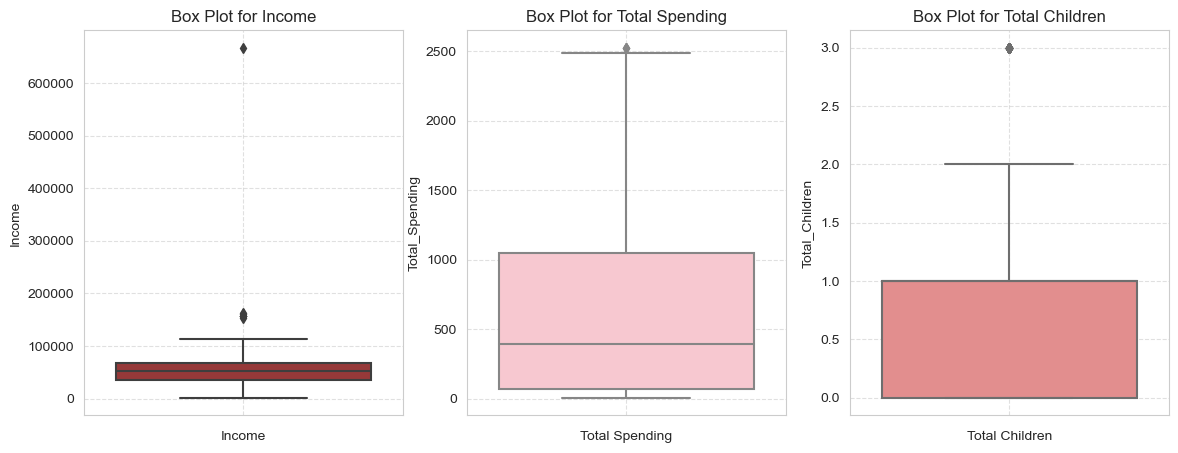

In [18]:
# Setting up color pallete and style
sns.set_palette("muted")
sns.set_style("whitegrid")

plt.figure(figsize=(14, 5))

# 1st boxplot
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='Income', color='brown')
plt.title('Box Plot for Income')
plt.xlabel('Income')
plt.grid(True, linestyle='--', alpha=0.6)

#2nd plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Total_Spending', color='pink')
plt.title('Box Plot for Total Spending')
plt.xlabel('Total Spending')
plt.grid(True, linestyle='--', alpha=0.6)

#3rd plot
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='Total_Children', color='lightcoral')
plt.title('Box Plot for Total Children')
plt.xlabel('Total Children')
plt.grid(True, linestyle='--', alpha=0.6);

# plt.tight_layout()
# plt.show()

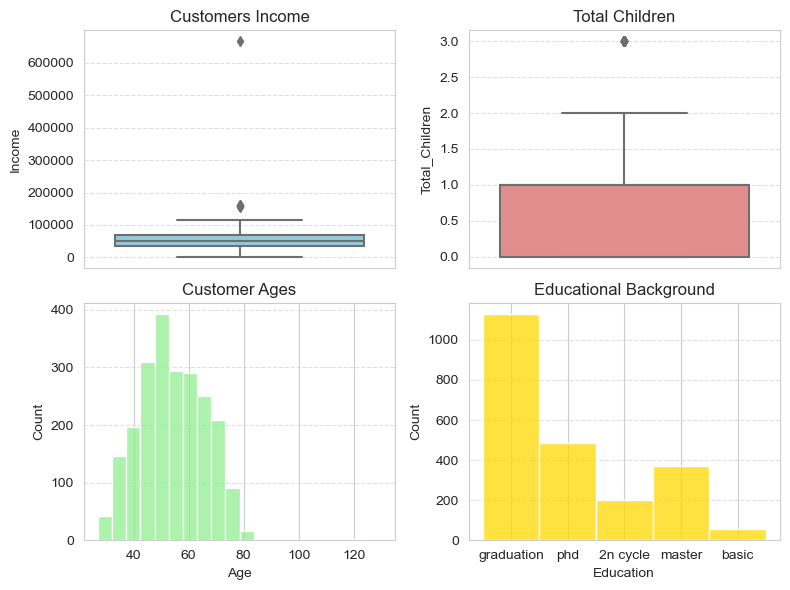

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Set3")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Box plots
sns.boxplot(data=df, y='Income', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Customers Income')
#axes[0, 0].set_xlabel('Income')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)

sns.boxplot(data=df, y='Total_Children', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Total Children')
#axes[0, 1].set_xlabel('Total Children')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.6)

# Histograms
sns.histplot(data=df, x='Age', bins=20, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Customer Ages')
axes[1, 0].set_xlabel('Age')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.6)

sns.histplot(data=df, x='Education', bins=20, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Educational Background')
axes[1, 1].set_xlabel('Education')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#### Perform outlier treatment.

In [ ]:
from scipy import stats

In [40]:
#Outliers for income 
#Find the quantiles first 
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

#The Lower_Spending and Upper_Spending are used to identify data points that lie outside the overall pattern in a distribution. 
#A data point is considered an outlier if it is more than 1.5 times the IQR above the third quartile or below the 
#first quartile.
#Find the IQR
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]
df['Income'] = df['Income'].clip(lower=lower_bound, upper=upper_bound)

In [41]:
#Outliers for age 
#Find the quantiles first 
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

#Find the IQR
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)

#### Testing outlier treatment

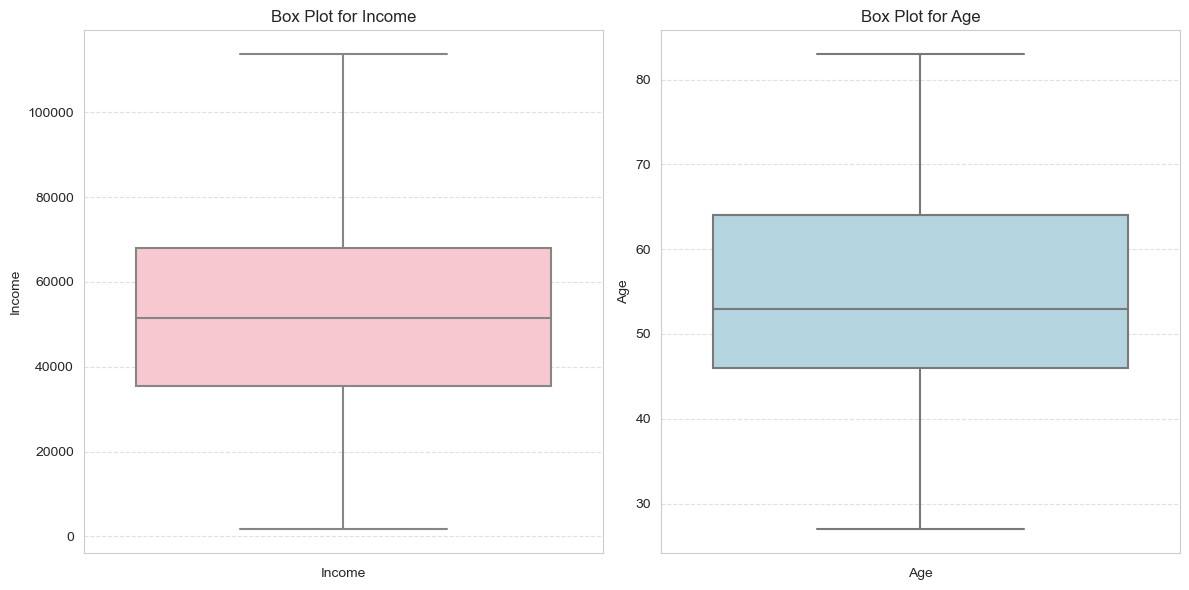

In [59]:
#Check by plotting if we removed the outliers correctly

sns.set_palette("Set2")
sns.set_style("whitegrid")


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plots for 'Income' after outlier treatment
sns.boxplot(data=df, y='Income', ax=axes[0], color='pink')
axes[0].set_title('Box Plot for Income')
axes[0].set_xlabel('Income')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Box plots for 'Age' after outlier treatment
sns.boxplot(data=df, y='Age', ax=axes[1], color='lightblue')
axes[1].set_title('Box Plot for Age')
axes[1].set_xlabel('Age')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#### Create a heatmap to showcase the correlation between different pairs of variables.

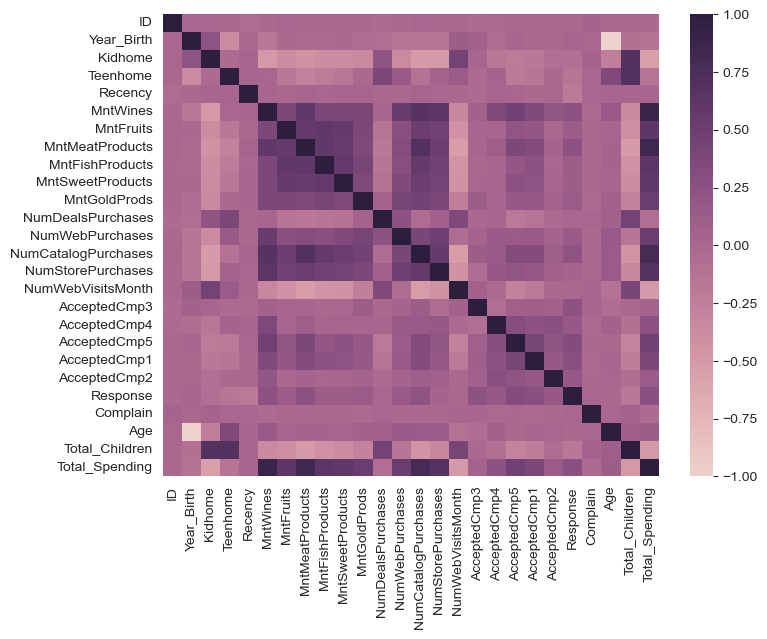

In [66]:
# Select only integer columns (excluding object columns) and store it in another df
df2 = df.select_dtypes(include='int')

# Create a correlation matrix
corr_matrix = df2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap=sns.cubehelix_palette(as_cmap=True));

### Stage 3: Hypothesis Testing

In [70]:
import numpy as np
from scipy import stats

#### Older people are not as tech-savvy and probably prefer shopping in-store.

In [76]:
#Gets the senior group, people above 60 and compare their acitivity.
#Type: Two sample Paired t-test (same group twice)
seniors_web = df[df['Age']>=60]['NumWebPurchases']
seniors_store = df[df['Age']>=60]['NumStorePurchases']

# Determine significance level
alpha = 0.05

# Calculate the p-value
_, p_value = stats.ttest_rel(seniors_store, seniors_web, alternative='greater')

# if the p-value is less than the significance level, reject the null hypothesis
print(f"p-value: {p_value:.4f}")
if p_value <= alpha:
    print("there is strong evidence suggesting store purchases is grater than web shopping!")
else:
    print("there is not enough evidence to show that store purchases is grater than web shopping")

p-value: 0.0000
there is strong evidence suggesting store purchases is grater than web shopping!


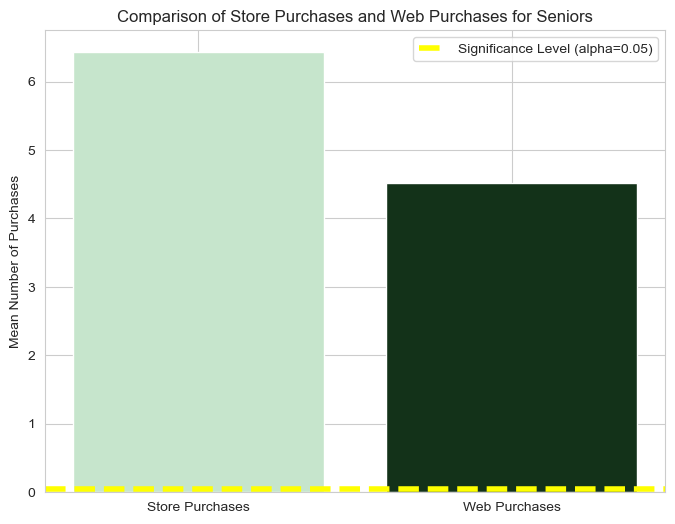

In [105]:
# plot??? 
means = [seniors_store.mean(), seniors_web.mean()]
labels = ['Store Purchases', 'Web Purchases']

colors = sns.cubehelix_palette(n_colors=2, start=2, rot=0)

plt.figure(figsize=(8, 6))
plt.bar(labels, means, color = colors)

plt.axhline(alpha, color='yellow', linestyle='--',linewidth=4, label=f'Significance Level (alpha={alpha})')

plt.title("Comparison of Store Purchases and Web Purchases for Seniors")
plt.ylabel("Mean Number of Purchases")
plt.legend()
plt.show()

#### Customers with kids probably have less time to visit a store and would prefer to shop online.

In [77]:
#Gets the customers with kids and compares their shopping activity, online vs. in store
#Type: Two sample Paired t-test (same group twice)
family_web = df[df['Total_Children']>0]['NumWebPurchases']
family_store = df[df['Total_Children']>0]['NumStorePurchases']

# Determine significance level
alpha = 0.05

# Calculate the p-value
_, p_value = stats.ttest_rel(family_web, family_store, alternative='greater')

# if the p-value is less than the significance level, reject the null hypothesis
print(f"p-value: {p_value:.4f}")
if p_value <= alpha:
    print("there is strong evidence suggesting web purchases is grater than store shopping!")
else:
    print("there is not enough evidence to show that web purchases is grater than store shopping")

p-value: 1.0000
there is not enough evidence to show that web purchases is grater than store shopping


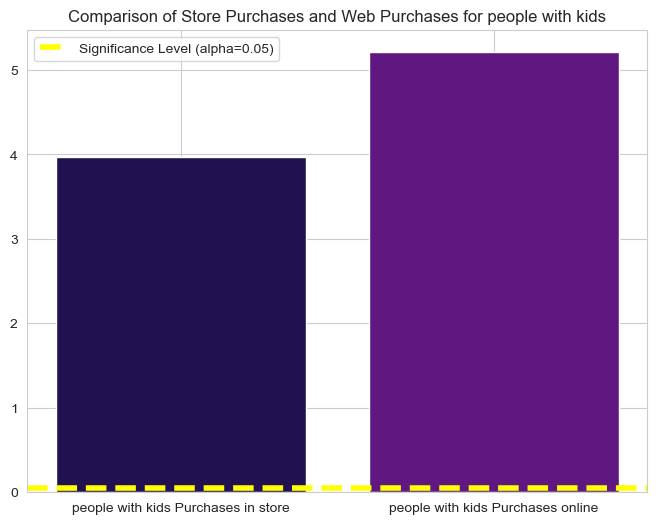

In [106]:
# plot??? 
means = [family_web.mean(), family_store.mean()]
labels = ['people with kids Purchases in store', 'people with kids Purchases online']

colors = sns.color_palette("magma")

plt.figure(figsize=(8, 6))
plt.bar(labels, means, color = colors)

plt.axhline(alpha, color='yellow', linestyle='--', linewidth=4, label=f'Significance Level (alpha={alpha})')

plt.title("Comparison of Store Purchases and Web Purchases for people with kids")
#plt.ylabel("")
plt.legend()
plt.show()

#### Other distribution channels may cannibalize sales at the store.

In [108]:
#Summing the purchases for channels other than store
df['other_channels_purch'] = df.loc[:,['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases']].sum(axis=1)

In [110]:
alpha = 0.05 # <-- significance level
_, p_value = stats.ttest_ind(df['other_channels_purch'], df["NumStorePurchases"], alternative='greater')
print('p_value:', p_value)
if p_value <= alpha:
    print("there is strong evidence suggesting that sales in other channels are significantly better than sales in the store.")
else:
    print("no sufficient evidence to show significant difference between sales made by other channels and the store")

p_value: 5.378849908380916e-128
there is strong evidence suggesting that sales in other channels are significantly better than sales in the store.


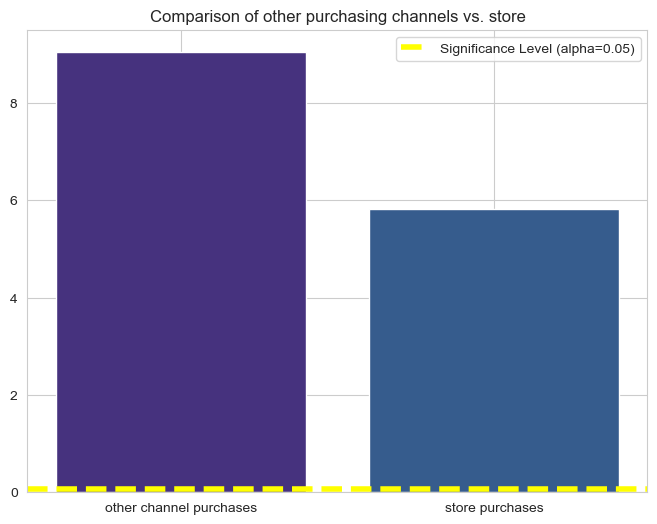

In [109]:
# plot??? 
means = [df['other_channels_purch'].mean(), df["NumStorePurchases"].mean()]
labels = ['other channel purchases', 'store purchases']

colors = sns.color_palette("viridis")

plt.figure(figsize=(8, 6))
plt.bar(labels, means, color = colors)

plt.axhline(alpha, color='yellow', linestyle='--', linewidth=4, label=f'Significance Level (alpha={alpha})')

plt.title("Comparison of other purchasing channels vs. store")
#plt.ylabel("")
plt.legend()
plt.show()

#### Does the US fare significantly better than the rest of the world in terms of total purchases?

In [74]:
#Summing the total purchases in all channels to a column Total_Purchases
df['Total_Purchases'] = df.loc[:,['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

In [75]:
#Getting the specific columns needed
#US_Spending includes the total purchases in the US
#Wolrd_Spending includes the total purchases in the world
US_Spending = df[df['Country']=='US']['Total_Purchases']
World_Spending = df[df['Country']!='US']['Total_Purchases']

alpha = 0.05 # <-- significance level
_, p_value = stats.ttest_ind(US_Spending, World_Spending, alternative='greater')
print('p_value:', p_value)
if p_value <= alpha:
    print("there is strong evidence suggesting that US fair significantly better than the rest of the world in terms of total purchases.")
else:
    print("no sufficient evidence to show significant difference between the US and the world.")

p_value: 0.07517436820768097
no sufficient evidence to show significant difference between the US and the world.


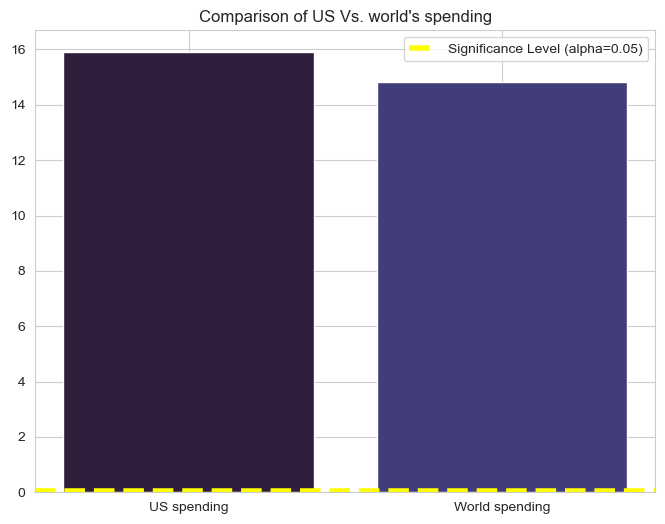

In [112]:
# plot??? 
means = [US_Spending.mean(), World_Spending.mean()]
labels = ['US spending', 'World spending']

colors = sns.color_palette("mako")

plt.figure(figsize=(8, 6))
plt.bar(labels, means, color = colors)

plt.axhline(alpha, color='yellow', linestyle='--', linewidth=4, label=f'Significance Level (alpha={alpha})')

plt.title("Comparison of US Vs. world's spending")
#plt.ylabel("")
plt.legend()
plt.show()

### Stage 4: Data Visualization

#### Which products are performing the best, and which are performing the least in terms of revenue?

#### Is there any pattern between the age of customers and the last campaign acceptance rate?

#### Which Country has the greatest number of customers who accepted the last campaign?

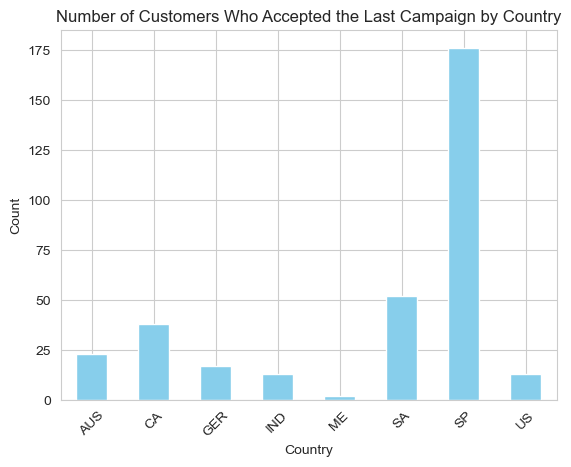

In [129]:
country_count = df.groupby("Country")["Response"].sum()

max_acceptance = country_count.max()

#plt.figure(figsize=(10, 6))
country_count.plot(kind="bar", color="skyblue")

plt.bar(max_acceptance, country_count)

plt.title("Number of Customers Who Accepted the Last Campaign by Country")
plt.xlabel("Country")
plt.ylabel("Count")
#plt.legend()
plt.xticks(rotation=45)

plt.show()

#### Do you see any pattern in the no. of children at home and total spend?

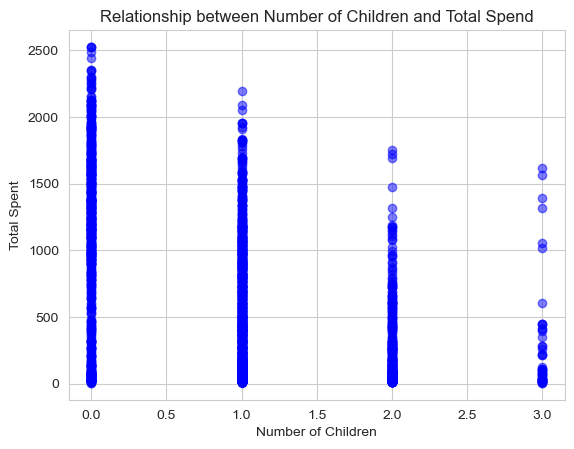

In [131]:
plt.scatter(df['Total_Children'], df['Total_Spending'], alpha=0.5, color='b')
plt.title("Relationship between Number of Children and Total Spend")
plt.xlabel("Number of Children")
plt.ylabel("Total Spent")
plt.grid(True)
plt.show()

#### Education background of the customers who complained in the last 2 years.

### Insight